<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/MultiOscillator_StandingAndTravelingWaves3Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Traveling and Standing Waves for Three-Phase System</h1></b>

Dr. Bingsen Wang

11/10/2024
</center>

#Python Code


0
0
50
100
150
200
250
300
350
400
450
0


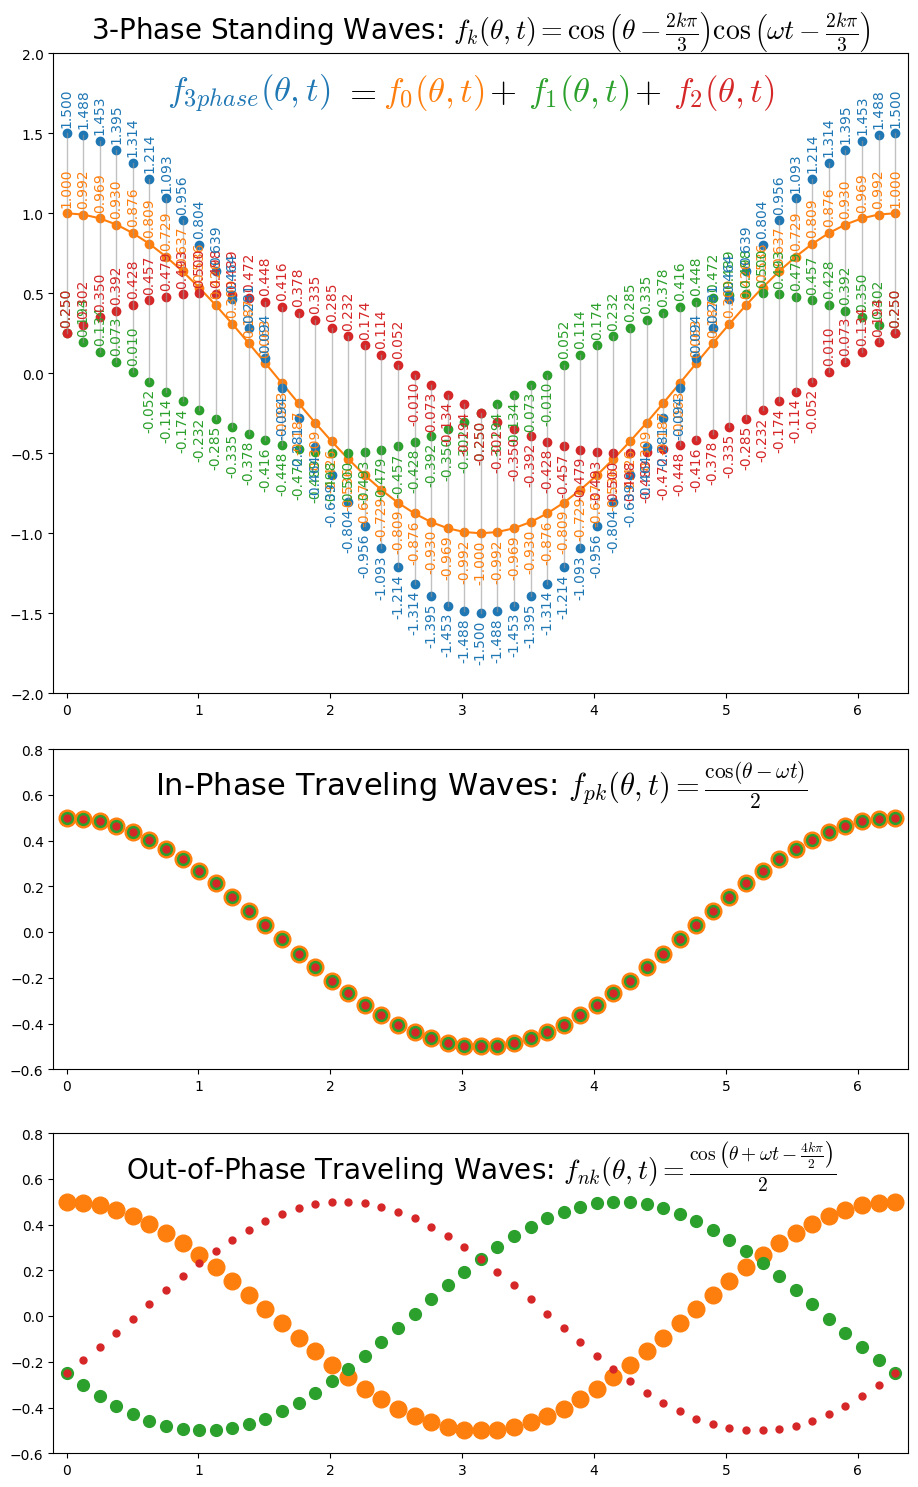

In [2]:
import numpy as np
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
Nf=51
theta,t = np.linspace(0,2*np.pi,Nf),np.linspace(0,1,500)
clst = list(cm.tab10.colors)[1:4]+ [list(cm.tab10.colors)[0]]#colors of lines
fig = pyplot.figure(figsize=([9,16]),facecolor='none')
ax0 = fig.add_axes((.05,.5,.95,.4),xlim=[min(theta)-.1,max(theta)+.1], ylim=[-2,2],fc='none')
ax1 = fig.add_axes((.05,.265,.95,.2),xlim=[min(theta)-.1,max(theta)+.1], ylim=[-.6,.8],fc='none')
ax2 = fig.add_axes((.05,.025,.95,.2),xlim=[min(theta)-.1,max(theta)+.1], ylim=[-.6,.8],fc='none')
ax0.set_title(r'3-Phase Standing Waves: $f_k(\theta,t)=\cos\left(\theta-\frac{2k\pi}{3}\right) \cos\left(\omega t -\frac{2k\pi}{3}\right)$',size=20)
ax0.text(2,1.7,r'$f_{3phase}(\theta,t)$',color=clst[3],size=25,ha='right')
ax0.text(2.1,1.7,r'$=$',size=25)
ax0.text(2.4,1.7,r'$f_0(\theta,t)$',color=clst[0],size=25)
ax0.text(3.2,1.7,r'$+$',size=25)
ax0.text(3.5,1.7,r'$f_1(\theta,t)$',color=clst[1],size=25)
ax0.text(4.3,1.7,r'$+$',size=25)
ax0.text(4.6,1.7,r'$f_2(\theta,t)$',color=clst[2],size=25)
ax1.text(np.pi,.6,r'In-Phase Traveling Waves: $f_{pk}(\theta,t) = \frac{\cos(\theta-\omega t)}{2}$',size=22,ha='center')
ax2.text(np.pi,.6,r'Out-of-Phase Traveling Waves: $f_{nk}(\theta,t) = \frac{\cos\left(\theta+\omega t-\frac{4k\pi}{2}\right)}{2}$',size=20,ha='center')
lines=[ax0.plot([],[],'o',markersize=6,color=clst[i])[0] for i in range(4)]
lines1=[ax1.plot([],[],'o',markersize=6,color=clst[i])[0] for i in range(3)]
lines2=[ax2.plot([],[],'o',markersize=6,color=clst[i])[0] for i in range(3)]
lines[0].set_ls('-')
lines_v = [ax0.plot([],[],'-',c='.6',lw=1,alpha=.6)[0] for i in range(Nf)]
texts=[[ax0.text(0,0,'',c=clst[k],ha='center',size=10) for i in range(Nf)]for k in range(4)]
def animate(i):
  if i%50==0: print(i) #for monitoring
  y = [np.cos(theta-k*2*np.pi/3)*np.cos(2*np.pi*t[i]-k*2*np.pi/3) for k in range(3)]
  y_right=[np.cos(theta-2*np.pi*t[i])/2 for k in range(3)]
  y_left=[np.cos(theta+2*np.pi*t[i]-4*k*np.pi/3)/2 for k in range(3)]
  y.append(y[0]+y[1]+y[2]) # 3-phase total
  lines[3].set_data(theta,y[3])
  [lines_v[k].set_data([theta[k],theta[k]],[max(np.array(y)[:,k]),min(np.array(y)[:,k])]) for k in range(Nf)]
  for k in range(3):
    lines[k].set_data(theta,y[k])
    lines1[k].set_data(theta,y_right[k])
    lines1[k].set_markersize(12-3.5*k)
    lines2[k].set_data(theta,y_left[k])
    lines2[k].set_markersize(12-3.5*k)
  for k in range(4):
    y_sign=(np.sign(y[k])+1)/2
    [texts[k][j].set_position([theta[j],y[k][j]+.08*(y_sign[j]-.5)]) for j in range(Nf)]
    [texts[k][j].set_text(f'{y[k][j]:.3f}') for j in range(Nf)]
    [texts[k][j].set_rotation(90) for j in range(Nf)]
    [texts[k][j].set_va(['top','bottom'][int(y_sign[j])]) for j in range(Nf)]
  return
anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=50)
anim.save("MultiOscillator_StandingAndTravelingWaves3Phase.mp4", writer=animation.FFMpegWriter(fps=50), dpi = 200)